# Assignment 1: Supervised Learning [ __ / 100 marks]

<img src="https://miro.medium.com/max/700/1*uo6VfVH87jRjMZWVdwq3Vw.png"/>

In this assignment we will be comparing the fits of the $L_2$ (OLS) and $L_1$ (LAD) cost functions on the famous iris dataset. Take a look at L1_C.ipynb if you get stuck (you can find this on OWL --> Lessons --> Week 1: "Supervised Learning, Regression"). Note: for brevity, I will write $L_2$ as L2 and $L_1$ as L1.

#### Before you start...

Recall the L1 loss function:

$$L_1(\theta) = \sum_{i=1}^{n} \lvert {y_i-\hat{y_i}} \rvert$$

Also recall the L2 loss function:

$$L_2(\theta) = \sum_{i=1}^{n} ({y_i-\hat{y_i}})^2$$

#### Ok, let's start...

In [1]:
# imports
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.optimize as so
from IPython.display import display
%matplotlib inline

### Question 1.1 [ _ /4 marks]

Download the file `iris.csv` (from the A1 page) into the same folder as this notebook. Using pandas, read this csv file into a DataFrame. Next, plot a scatter plot using the "petal.width" column as your independent variable and "sepal.length" as your dependent variable. Label the axes. 

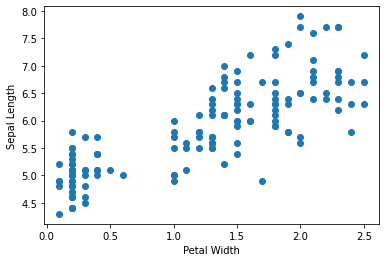

In [2]:
# read the csv in with pandas [ /1 mark]
# ****** your code here ******
df=pd.read_csv("iris.csv")

# plot a scatter plot with labels [ /3 marks]
# ****** your code here ******
petal_width=df.loc[:,"petal.width"]
sepal_length=df.loc[:,"sepal.length"]
plt.scatter(petal_width,sepal_length)
plt.xlabel("Petal Width")
plt.ylabel("Sepal Length")
plt.show()



### Question 1.2 [ _/4 marks]

For a linear model we obtain predictions using $ \mathbf{\hat{y}} = \mathbf{X} \mathbf{b} $, where $\mathbf{X}$ has a column of ones and a column of inputs $x_i$, and $\mathbf{b}$ contains parameters $b_0$ and $b_1$. 

\begin{equation}
\begin{bmatrix}
\hat{y_0}\\
\hat{y_1}\\
.. \\
\hat{y_n}
\end{bmatrix}
= 
\begin{bmatrix}
1 & x_0\\
1 & x_1\\
.. & .. \\
1 & x_n
\end{bmatrix}
\begin{bmatrix}
b_0\\
b_1\\
\end{bmatrix}
\end{equation}

Write a function called `linearModelPredict` which returns predictions `yp` (a 1d-array) given arguments X (a 2d-array) and b (a 1d-array). Test this function with the values provided (i.e. print or display the result of the function call). 

In [3]:
# write your function here [ /2 marks]
def linearModelPredict(b,X):
    yp =np.dot(X,b) # ****** your code here ******
    return yp

# use these provided values
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])

# test your function here [ /2 marks]
# ****** your code here ******
y_pred=linearModelPredict(b,X)
print(y_pred)


[ 0.1 -0.2  0.7]


### Question 1.3 [ _/8 marks]

Write a function called `linearModelLossRSS` which returns a 2-tuple containing the L2 loss value (rss) and the gradient (provided) given arguments b (1d-array), X (2d-array), and y (observed output, a 1d-array). Test linearModelLossRSS with the values provided for X, b, and y by calling said function with these values and displaying or printing the resulting output. 

In [4]:
# write your function here [ /6 marks]
def linearModelLossRSS(b,X,y):
    yp =linearModelPredict(b,X) # ****** your code here ******
    res =y-yp # ****** your code here ******
    rss =sum(res**2) # ****** your code here ******
    gradient= -2*np.dot(res,X) #-2*np.dot(np.transpose(X),res)
    return (rss, gradient)

# use these provided values 
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

# test your function here [ /2 marks]
# ****** your code here ******
RSS,gradient=linearModelLossRSS(b,X,y)
print("RSS:",RSS)
print("Gradient:",gradient)

RSS: 2.06
Gradient: [-3.6 -4. ]


### Question 1.4 [ _/8 marks]

Write a function called `linearModelLossLAD`: it returns a 2-tuple containing the L1 loss value (sad) and the gradient (provided) given arguments b (1d-array), X (2d-array), and y (observed output, a 1d-array). Test linearModelLossLAD with the values provided for X, b, and y by calling the function with these values and displaying or printing the resulting output.

In [5]:
# write your function here [ /6 marks]
def linearModelLossLAD(b,X,y):
    yp = linearModelPredict(b,X)# ****** your code here ******
    res =y-yp # ****** your code here ******
    sad =sum(abs(res)) # ****** your code here ******
    grad = - (np.dot(np.sign(res),X))
    return (sad,grad)

# use these provided values
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

#test your function here [ /2 marks]
# ****** your code here ******
SAD,grad=linearModelLossLAD(b,X,y)
print("SAD:",SAD)
print("Gradient:",grad)


SAD: 2.0
Gradient: [-1. -1.]


### Question 1.5 [ _/14 marks]

Write a function called `linearModelFit` which returns a 2-tuple containing a prediction for b (`bpr`, a 1d-array) and the $R^2$ value (`R2`) of your fit, given arguments X (2d-array), y (1d-array), and lossf (the loss function for your fit). For now, set lossf as the L2 loss function that you defined previously. Call linearModelFit with the provided values and print the result.

In [6]:
# write your function here [ /12 marks]
def linearModelFit(X,y,lossf =linearModelLossRSS): # ****** your code here ****** ):
    nrows,ncols = X.shape
    bpr=np.zeros((ncols,1))
    RES = so.minimize(lossf, bpr, args=(X,y),jac=True)# ****** your code here ******
    bpr=RES.x # ****** your code here ******
    
    res =y-np.mean(y) # ****** your code here ******
    TSS =sum(res**2) # ****** your code here ******
    RSS,deriv = linearModelLossRSS(bpr,X,y)# ****** your code here ******
    R2 = 1-(RSS/TSS)# # ****** your code here ******
    return (bpr,R2)

# use these provided values
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

# test your function here [ /2 marks]
# ****** your code here ******
bpr,R2=linearModelFit(X,y)
print("b_pred:",bpr)
print("R2:",R2)

b_pred: [0.6 0.6]
R2: 0.75


### Question 2.1 [ _/13 marks]

Let's fit our L1 and L2 models to the iris data from Question 1.1 and then plot our prediction lines. We'll start with L2: Fit the data from 1.1 using `linearModelFit` (with `lossf = linearModelLossRSS`) to get an estimate for b (name it `bpr`). Use bpr to generate a prediction line for new data `X_new` (provided). In a single figure, plot the data points with the fit line; label the axes; finally, display or print the $R^2$ value (or alternatively, annotate the plot with the $R^2$ value).

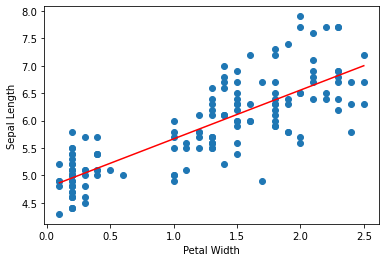

R2 value for L2 loss: 0.6690276860464136


In [7]:
# put data from 1.1 into X,y [ /4 marks]
y = df.loc[:,"sepal.length"].values
x = df.loc[:,"petal.width"].values# ****** your code here ******
X = np.transpose(np.concatenate([[np.ones(len(df))], [x] ] ))   # ****** your code here ******

# fit this data with linearModelFit [ /2 marks]
bpr, R2 =linearModelFit(X,y) # ****** your code here ******

# use this data for your prediction plot
x_grid = np.linspace(x.min(), x.max(),10)
Xnew = np.c_[np.ones(x_grid.size), x_grid]
#Saving this original data 
original_data_X=Xnew

# get your predicted y using Xnew [ /2 marks]
yp_for_L2_original_data =linearModelPredict(bpr,Xnew) # ****** your code here ******

# plot the iris data with your prediction line, print R2 [ /5 marks]
# ****** your code here ******
plt.scatter(X[:,1],y)
plt.plot(Xnew[:,1],yp_for_L2_original_data,color="red")
plt.xlabel("Petal Width")
plt.ylabel("Sepal Length")
plt.show()
print("R2 value for L2 loss:",R2)




### Question 2.2 [ _/15 marks]

Now consider L1 as your loss function. Fit the data from 1.1 using `linearModelFit` with `lossf = linearModelLossLAD` to get an estimate for b (name it `bpr`). Use bpr to generate a prediction line for new data `X_new` (provided). In a single figure, plot the data points and fit line; also label the plot with axes; finally, print the $R^2$ value (or annotate the plot). Which of the two fit lines appears to best match the data? Write your answer below.

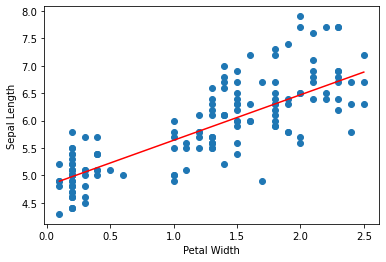

R2 value for L1 loss: 0.663857934044435

There is a slight difference in the values of R2 for L1 and L2 loss. But still because of the difference, the line for L2 loss (having a slightly greater value) is better fit for the data.


In [8]:
# put data from 1.1 into X,y [ /4 marks]
y = df.loc[:,"sepal.length"].values
x = df.loc[:,"petal.width"].values# ****** your code here ******
X = np.transpose(np.concatenate([[np.ones(len(df))], [x] ] ))  # ****** your code here ******

# fit the data with linearModelFit [ /2 marks]
bpr, R2 = linearModelFit(X,y,linearModelLossLAD) # ****** your code here ******

# use this data for your prediction plot
x_grid = np.linspace(x.min(), x.max(),10)
Xnew = np.c_[np.ones(x_grid.size), x_grid]

# get your predicted y ('yp') using Xnew [ /2 marks]
yp_for_L1_original_data =linearModelPredict(bpr,Xnew) # ****** your code here ******

# plot the iris data with your prediction line, print R2 [ /5 marks]
# ****** your code here ******
plt.scatter(X[:,1],y)
plt.plot(Xnew[:,1],yp_for_L1_original_data,color="red")
plt.xlabel("Petal Width")
plt.ylabel("Sepal Length")
plt.show()
print("R2 value for L1 loss:",R2)


#  Which of the two fit lines appears to best match the data? [ /2 marks]

print("\nThere is a slight difference in the values of R2 for L1 and L2 loss. But still because of the difference, the line for L2 loss (having a slightly greater value) is better fit for the data.") 

### Question 2.3 [ _/20 marks]

Download the file `outliers.csv` (from the A1 page) into the same folder as this notebook. Using pandas, read this file into a DataFrame, then append this to your iris dataset DataFrame. Perform an L1 fit and an L2 fit on this combined DataFrame (iris + outliers). Finally, plot lines of best fit using new x values (i.e. the code is provided for the L2 fit and you can reuse those lines of code for L1). Which of the two fit lines appears to best match the data? Write your answer below. 

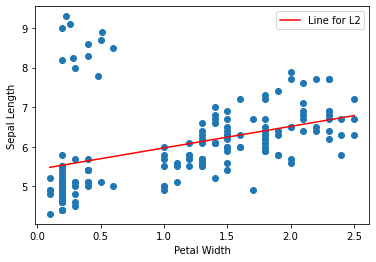

R2 for L2: 0.15124448500184962


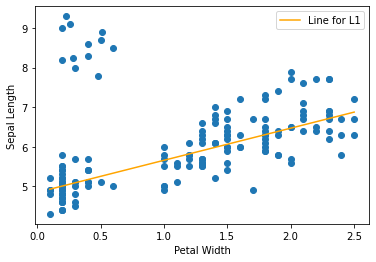

R2 for L1: 0.04863612441309251


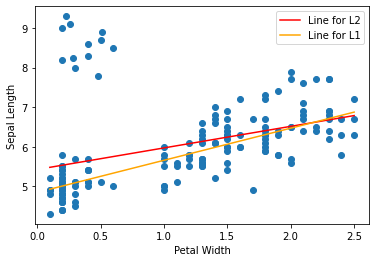


 The line for L2 loss is a better fit for the data since it has greater R2 value.


In [9]:
# read outliers.csv, append it to original dataframe [ /2 marks]
# ****** your code here ******
df_w_outliers=pd.read_csv("outliers.csv")
# put data (iris + outliers) into variables X,y [ /5 marks]
frames = [df, df_w_outliers]
df_new = pd.concat(frames)

y =df_new.loc[:,"sepal.length"].values
x = df_new.loc[:,"petal.width"].values # ****** your code here ******
X = np.transpose(np.concatenate([[np.ones(len(df_new))], [x] ] )) # ****** your code here ******

# fit the data with linearModelFit [ /2 marks]
bpr, R2 =linearModelFit(X,y) # ****** your code here ******

# use new x data for your prediction plot
x_grid = np.linspace(x.min(), x.max(),10)
Xnew = np.c_[np.ones(x_grid.size), x_grid]

# get your predicted y ('yp') using Xnew [ /2 marks]
yp_for_L2 =linearModelPredict(bpr,Xnew) # ****** your code here ******

# plot the iris data with your prediction line, print R2 [ /5 marks]
# ****** your code here ******
plt.scatter(X[:,1],y)
plt.plot(Xnew[:,1],yp_for_L2,color="red",label="Line for L2")
plt.legend()
plt.xlabel("Petal Width")
plt.ylabel("Sepal Length")
plt.show()
print("R2 for L2:",R2)

# repeat the above process for L1 (i.e. repeat lines 10-17 for L1) [ /2 marks]
# ****** your code here ******
bpr, R2 = linearModelFit(X,y,linearModelLossLAD)
# use new x data for your prediction plot
x_grid = np.linspace(x.min(), x.max(),10)
Xnew = np.c_[np.ones(x_grid.size), x_grid]

# get your predicted y ('yp') using Xnew [ /2 marks]
yp_for_L1=linearModelPredict(bpr,Xnew) # ****** your code here ******

# plot the iris data with your prediction line, print R2 [ /5 marks]
# ****** your code here ******
plt.scatter(X[:,1],y)
plt.plot(Xnew[:,1],yp_for_L1,color="orange",label="Line for L1")
plt.legend()
plt.xlabel("Petal Width")
plt.ylabel("Sepal Length")
plt.show()
print("R2 for L1:",R2)

#Both lines in a single plot
plt.scatter(X[:,1],y)
plt.plot(Xnew[:,1],yp_for_L2,color="red",label="Line for L2")
plt.plot(Xnew[:,1],yp_for_L1,color="orange",label="Line for L1")
plt.legend()
plt.xlabel("Petal Width")
plt.ylabel("Sepal Length")
plt.show()
#  Which of the two fit lines appears to best match the data? [ /2 marks]

print("\n The line for L2 loss is a better fit for the data since it has greater R2 value.")

### Question 2.4: [ _/14 marks]

Ok, let's put everything together into a single plot. To start, plot the combined DataFrame (iris + outliers). Next, plot prediction lines for L1 and L2 fits on the combined data. Finally, plot prediction lines for L1 and L2 fits on the original (iris) data. Add a legend; also add axis labels. *Based on this plot, does L1 loss or L2 loss appear to be more robust to outliers?*

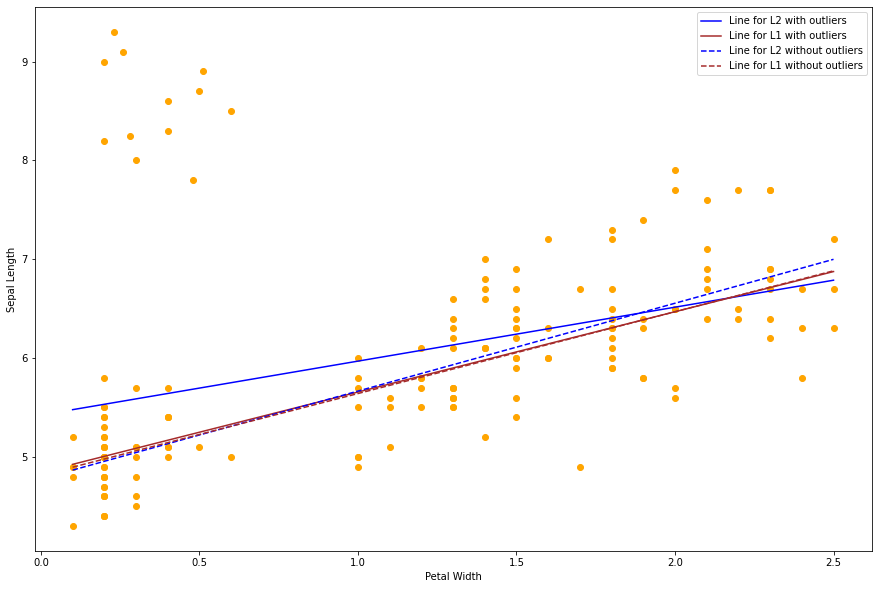

L1 loss appears to be more robust to outliers as there's not much difference in the lines with and without outliers, so there's not much effect of outliers on L1 loss


In [10]:
# this increases the figure size for added viewability
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# plot the data and fits (L1, L2) for the combined dataset [ /5 marks]
# ****** your code here ******
plt.scatter(X[:,1],y,color="orange")
plt.plot(Xnew[:,1],yp_for_L2,color="blue",label="Line for L2 with outliers")
plt.plot(Xnew[:,1],yp_for_L1,color="brown",label="Line for L1 with outliers")
plt.legend()
# plot fits (L1, L2) for the original iris dataset [ /5 marks], include legend/labels [ /2 marks]
# ****** your code here ******
plt.plot(original_data_X[:,1],yp_for_L2_original_data,color="blue",label="Line for L2 without outliers",linestyle='--')
plt.plot(original_data_X[:,1],yp_for_L1_original_data,color="brown",label="Line for L1 without outliers",linestyle='--')
plt.legend()
plt.xlabel("Petal Width")
plt.ylabel("Sepal Length")
plt.show()


# Based on this plot, does L1 loss or L2 loss appear to be more robust to outliers? [ /2 marks]

print("L1 loss appears to be more robust to outliers as there's not much difference in the lines with and without outliers, so there's not much effect of outliers on L1 loss")

EXTRA PART


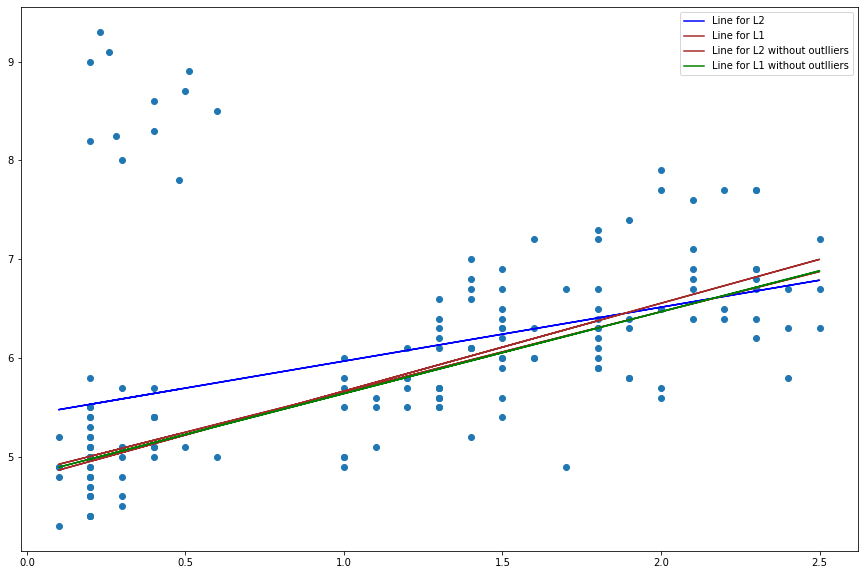

L1 loss appears to be more robust to outliers as there's not much difference in the lines with and without outliers, so there's not much effect of outliers on L1 loss


In [11]:
#"Extra Part"
print("EXTRA PART")
#Another way to do Question 2.4
#Instead of storing values in different variable, directly calling the function
#Code almost same just few changes from above one


# this increases the figure size for added viewability
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

#First using the dataset with outliers i.e. iris + outliers
y =df_new.loc[:,"sepal.length"].values
x = df_new.loc[:,"petal.width"].values # ****** your code here ******
X = np.transpose(np.concatenate([[np.ones(len(df_new))], [x] ] )) # ****** your code here ******


# For L2 loss
# fit the data with linearModelFit [ /2 marks]
bpr, R2 =linearModelFit(X,y) # ****** your code here ******


# get your predicted y ('yp') using Xnew [ /2 marks]
yp_for_L2 =linearModelPredict(bpr,X)
plt.scatter(X[:,1],y)
plt.plot(X[:,1],yp_for_L2,color="blue",label="Line for L2")

# For L1 loss
# fit the data with linearModelFit
bpr, R2 =linearModelFit(X,y,linearModelLossLAD) # ****** your code here ******

# get your predicted y ('yp') using Xnew [ /2 marks]
yp_for_L1 =linearModelPredict(bpr,X)
plt.plot(X[:,1],yp_for_L1,color="brown",label="Line for L1")
plt.legend()



#Now for the original dataset without outliers i.e. iris

y =df.loc[:,"sepal.length"].values
x = df.loc[:,"petal.width"].values # ****** your code here ******
X = np.transpose(np.concatenate([[np.ones(len(df))], [x] ] )) # ****** your code here ******



# For L2 loss
# fit the data with linearModelFit 
bpr, R2 =linearModelFit(X,y) # ****** your code here ******


# get your predicted y ('yp') using Xnew [ /2 marks]
yp_for_L2 =linearModelPredict(bpr,X)
plt.plot(X[:,1],yp_for_L2,color="brown",label="Line for L2 without outlliers")


# For L1 loss
bpr, R2 =linearModelFit(X,y,linearModelLossLAD) # ****** your code here ******


# get your predicted y ('yp') using Xnew [ /2 marks]
yp_for_L1 =linearModelPredict(bpr,X)
plt.plot(X[:,1],yp_for_L1,color="green",label="Line for L1 without outlliers")
plt.legend()
plt.show()





# Based on this plot, does L1 loss or L2 loss appear to be more robust to outliers? [ /2 marks]
print("L1 loss appears to be more robust to outliers as there's not much difference in the lines with and without outliers, so there's not much effect of outliers on L1 loss")